In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import seaborn as sbn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report,confusion_matrix ,accuracy_score , mean_squared_error

In [2]:
data=pd.read_csv(r"D:\data\diabetes_prediction_dataset.csv")

# Explore The Data

In [3]:
data.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
67934,Female,60.0,0,0,No Info,33.75,4.5,80,0
71559,Female,33.0,1,0,ever,52.68,6.0,130,1
85288,Female,80.0,0,0,No Info,23.16,4.0,80,0
48529,Female,68.0,0,0,No Info,27.32,5.0,130,0
83915,Male,57.0,1,0,current,27.32,6.2,140,0


In [4]:
data.shape

(100000, 9)

In [5]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [8]:
data.describe(include="object")

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


In [9]:
data["gender"].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [10]:
data["gender"].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [11]:
data = data[data['gender'] != 'Other']

In [12]:
data["smoking_history"].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [13]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

# Dealing with Duplicates

In [14]:
data.duplicated().sum()

3854

In [15]:
data.drop_duplicates(keep ="last" , inplace=True)

In [16]:
data.duplicated().sum()

0

# EDA

<function matplotlib.pyplot.show(close=None, block=None)>

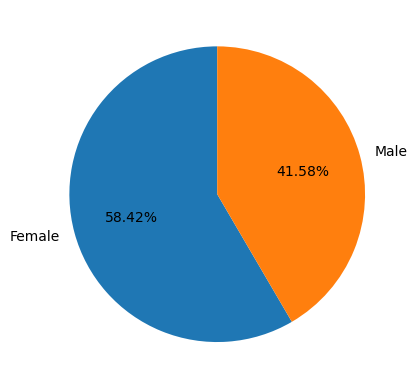

In [17]:
size=data["gender"].value_counts()
mat.pie(size, labels=size.index , autopct='%1.2f%%', startangle=90 )
mat.show

<BarContainer object of 6 artists>

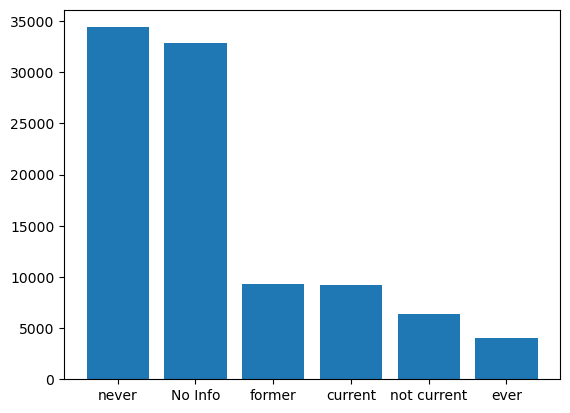

In [18]:
size=data["smoking_history"].value_counts()
mat.bar(size.index, size.values)

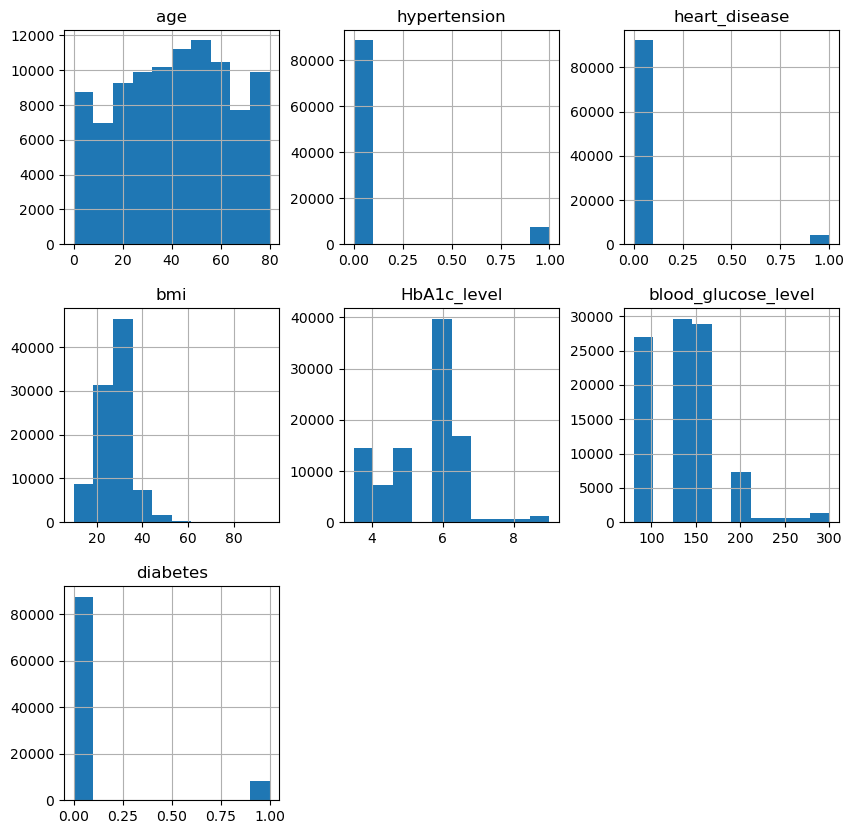

In [19]:
data.hist(figsize = (10,10))
mat.show()

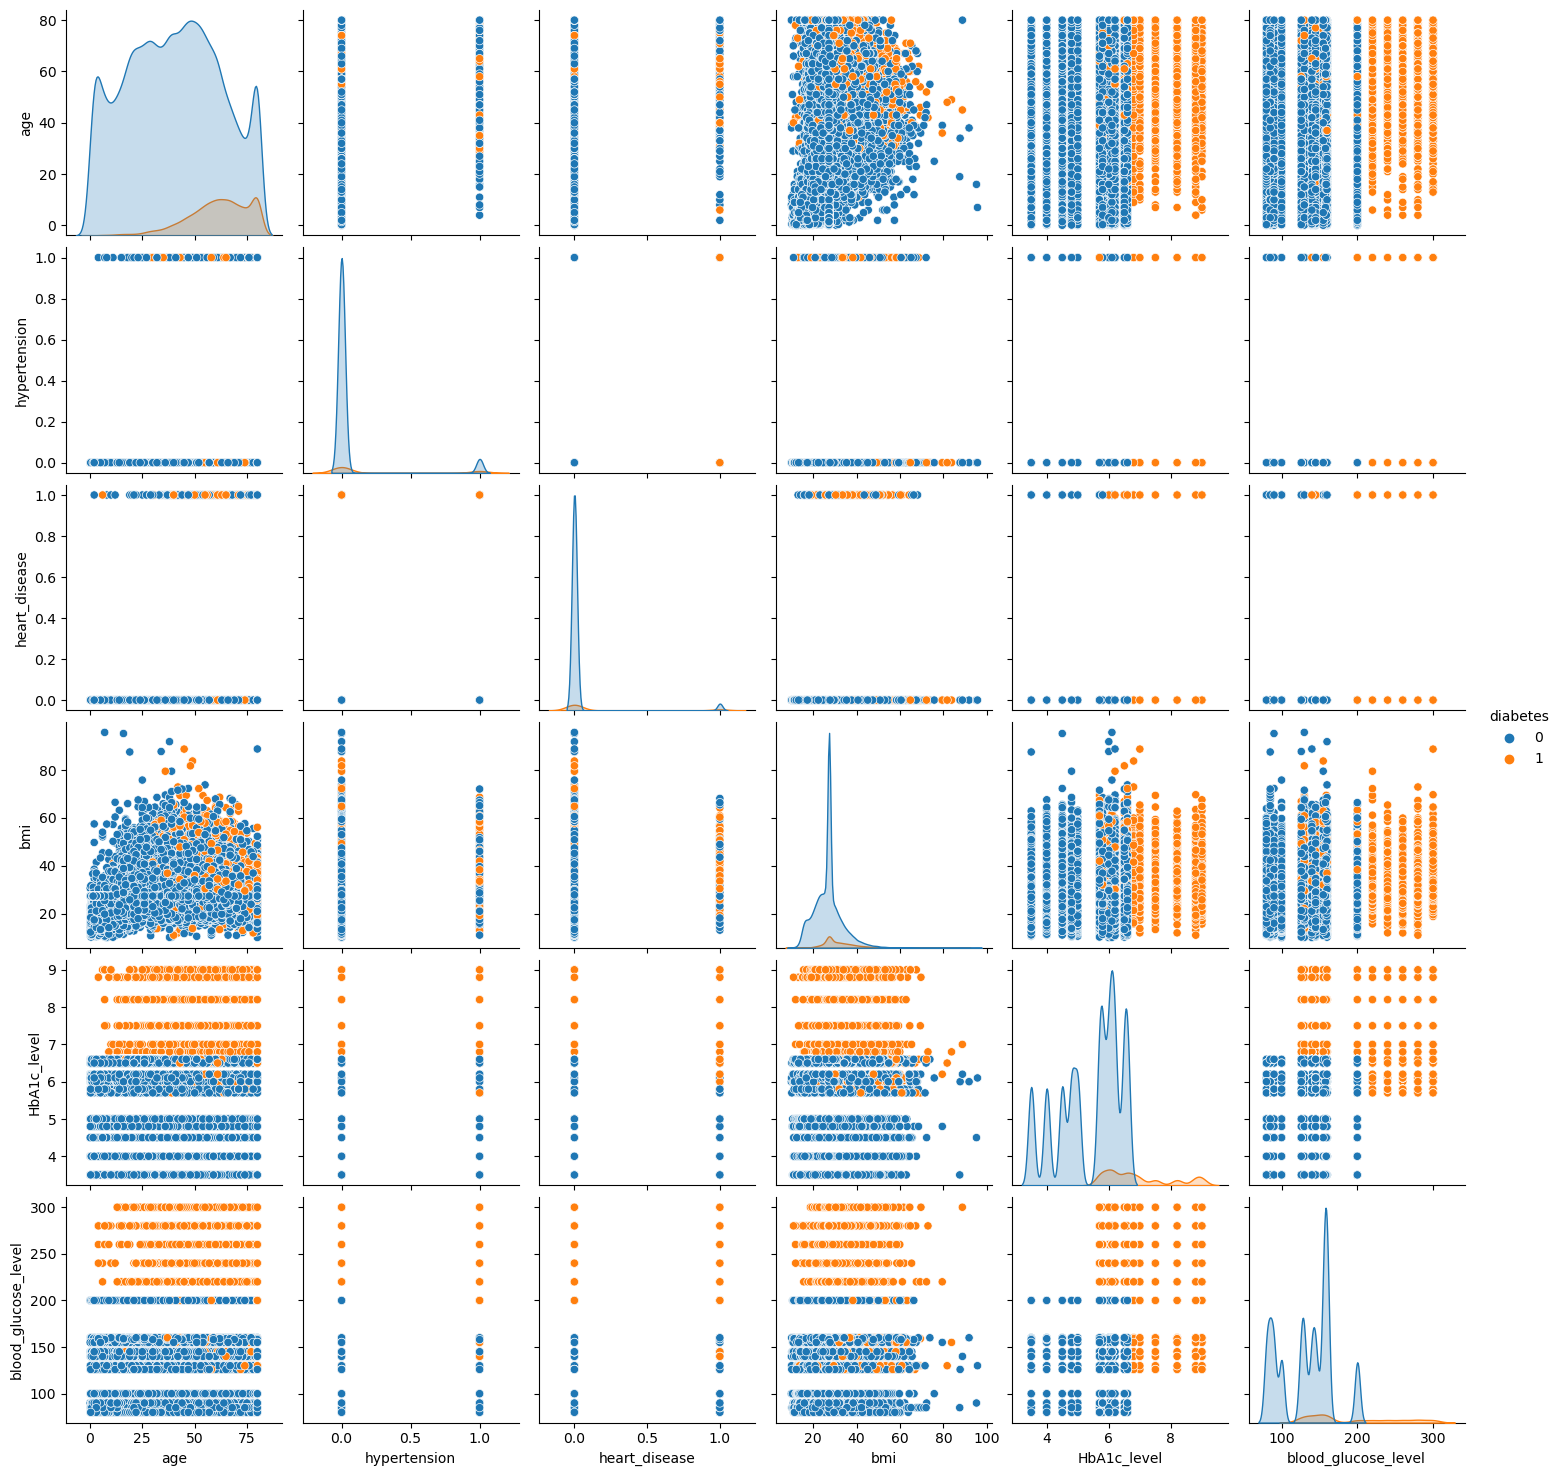

In [20]:
sbn.pairplot(data = data, hue = 'diabetes' )
mat.show()

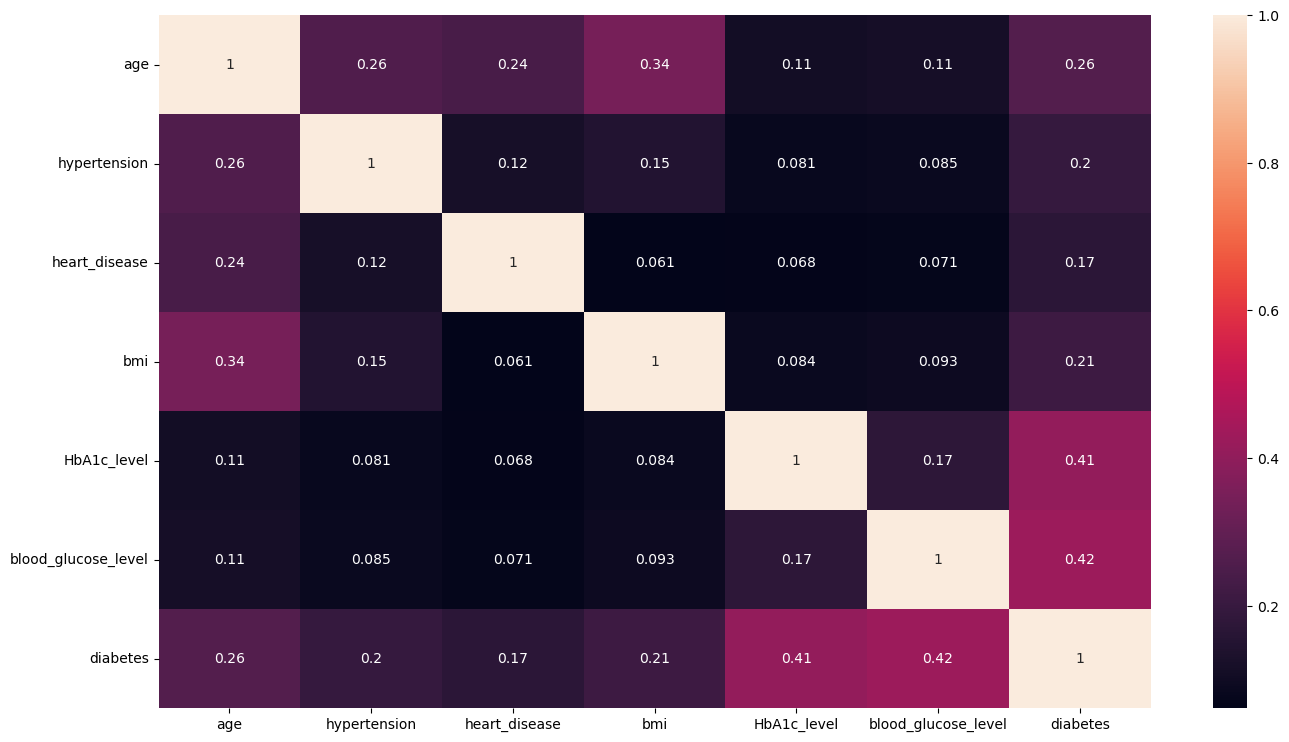

In [21]:
mat.figure(figsize=(16,9))
sbn.heatmap(data.corr(), annot=True);

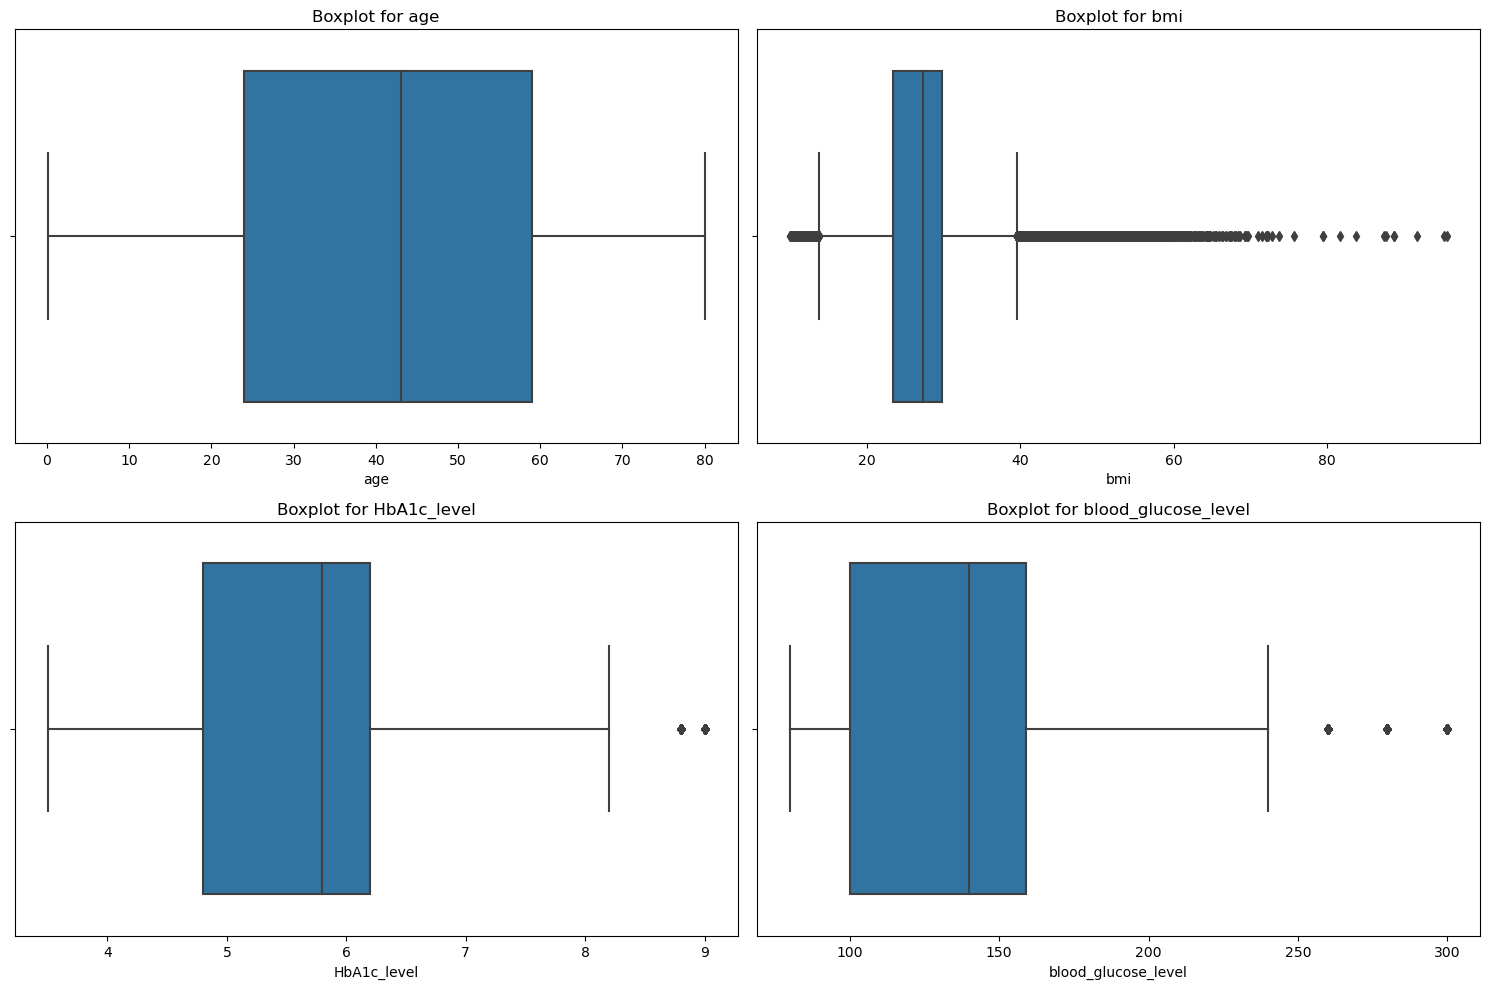

In [22]:
fig, axes = mat.subplots(2,2, figsize=(15, 10))

axes = axes.flatten()

for i, column in enumerate(data[['age','bmi', 'HbA1c_level', 'blood_glucose_level']]):
    sbn.boxplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

mat.tight_layout()
mat.show()

## Dealing with Outliers

In [23]:
for i in [ 'bmi', 'HbA1c_level', 'blood_glucose_level']:
    q1 = np.percentile(data[i], 25, interpolation='midpoint')  
    q3 = np.percentile(data[i], 75, interpolation='midpoint')  
    
    iqr = q3 - q1
    
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    
    outliers = data[(data[i] < low) | (data[i] > high)]
    
    data[i] = np.where(data[i] < low, low, data[i])  
    data[i] = np.where(data[i] > high, high, data[i]) 


In [24]:
outliers = data[(data[i] < low) | (data[i] > high)]
outliers

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes


# one_hot_encoding

In [25]:
encoder = OneHotEncoder(sparse_output=False, drop='first')  
encoded_data = encoder.fit_transform(data[["gender", "smoking_history"]])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(["gender", "smoking_history"]))

data = pd.concat([data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

data.drop(columns=["gender", "smoking_history"], inplace=True)

# Standard Scaler

In [26]:
scaler=StandardScaler()
for i in ["age", "bmi", "HbA1c_level"]:
    data[i] = scaler.fit_transform(data[[i]])

In [27]:
data.sample()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
26532,0.587778,0,0,0.04884,0.548411,200.0,0,1.0,1.0,0.0,0.0,0.0,0.0


# Spliting The Data

In [28]:
x=data.drop(columns="diabetes")
y=data["diabetes"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Models and Evaluation

In [30]:
dic={
"Logistic Regression":LogisticRegression(random_state=0),
"KNN":KNeighborsClassifier(n_neighbors=5),
"Decision Tree":DecisionTreeClassifier(random_state=0,max_depth=5),
"Random Forest":RandomForestClassifier(random_state=0),
"AdaBoost":AdaBoostClassifier(random_state=0),
"Naive":GaussianNB(),

}

result={}
for name ,i in dic.items():
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    print(name)
    print("# Accuracy --->",  accuracy_score(y_test, y_pred)*100)
    result[name]=accuracy_score(y_test, y_pred)*100
    print("# mean_squared_error--->",mean_squared_error(y_test, y_pred))
    print("# classification_report: \n",classification_report(y_test, y_pred))
    print("# confusion_matrix:  \n",confusion_matrix(y_test, y_pred))
    print("***************************************************************")



C:\Users\p&p\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
# Accuracy ---> 95.8129616144804
# mean_squared_error---> 0.04187038385519609
# classification_report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     17552
           1       0.85      0.63      0.72      1674

    accuracy                           0.96     19226
   macro avg       0.91      0.81      0.85     19226
weighted avg       0.96      0.96      0.96     19226

# confusion_matrix:  
 [[17360   192]
 [  613  1061]]
***************************************************************
KNN
# Accuracy ---> 96.1614480391137
# mean_squared_error---> 0.038385519608862995
# classification_report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     17552
           1       0.88      0.64      0.74      1674

    accuracy                           0.96     19226
   macro avg       0.93      0.82      0.86     19226
weighted avg       0.96      0.96      0.96     

C:\Users\p&p\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost
# Accuracy ---> 97.12368667429523
# mean_squared_error---> 0.028763133257047747
# classification_report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17552
           1       0.96      0.70      0.81      1674

    accuracy                           0.97     19226
   macro avg       0.96      0.85      0.90     19226
weighted avg       0.97      0.97      0.97     19226

# confusion_matrix:  
 [[17497    55]
 [  498  1176]]
***************************************************************
Naive
# Accuracy ---> 89.86788723603453
# mean_squared_error---> 0.10132112763965463
# classification_report: 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94     17552
           1       0.44      0.62      0.52      1674

    accuracy                           0.90     19226
   macro avg       0.70      0.77      0.73     19226
weighted avg       0.92      0.90      0.91     19226



In [31]:
result

{'Logistic Regression': 95.8129616144804,
 'KNN': 96.1614480391137,
 'Decision Tree': 97.22251118277333,
 'Random Forest': 96.87922604805992,
 'AdaBoost': 97.12368667429523,
 'Naive': 89.86788723603453}

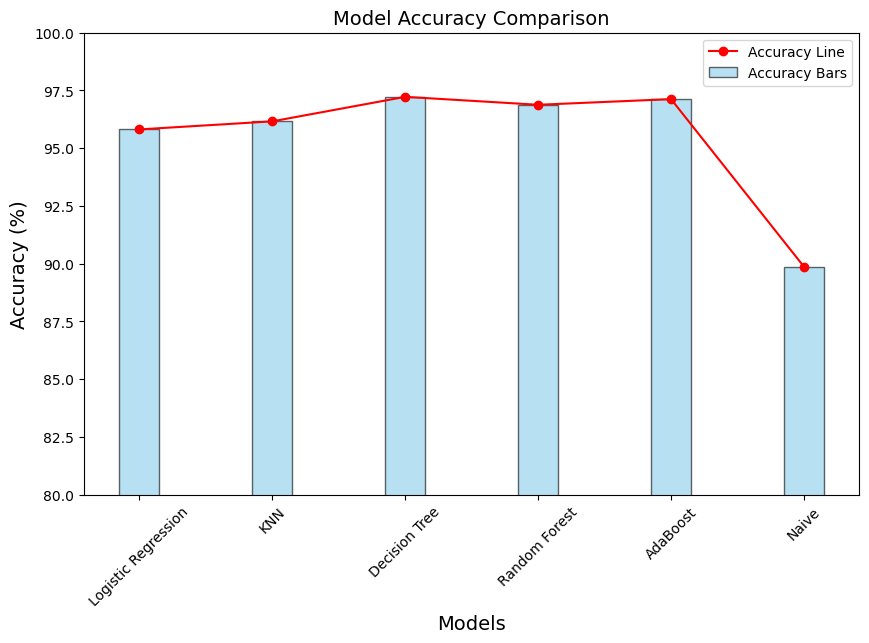

In [37]:
result_keys = list(result.keys())
accuracies = list(result.values())

mat.figure(figsize=(10, 6))
mat.plot(result_keys, accuracies, marker='o', color='red', label='Accuracy Line')
mat.bar(result_keys, accuracies, color='skyblue', alpha=0.6, width=0.3, label='Accuracy Bars',edgecolor='black')

mat.title('Model Accuracy Comparison',fontsize=14)
mat.xlabel('Models',fontsize=14)
mat.ylabel('Accuracy (%)',fontsize=14)
mat.xticks(rotation=45)
mat.ylim(80, 100)

mat.legend()
mat.show()
